In [373]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import math

In [59]:
stock1 = pd.read_csv("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600000.csv")

In [60]:
vars1 = pd.read_csv("/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600000.csv")

In [61]:
vars1.columns = ['Time', 'volumelag', 'rsilag', 'fastKlag', 'fastDlag', 'ADlag',
       'OBVlag', 'MA5lag', 'MA15lag', 'day5Returnlag', 'day15Returnlag',
       'PROClag']

In [62]:
vars1['Time']=vars1['Time'].astype(str)
stock1['Time']=stock1['Time'].astype(str)

In [63]:
merged1 = stock1.merge( vars1, on = 'Time', how = 'left')

In [64]:
price = merged1["Close"]
day3Return = np.zeros(len(merged1))
for i in range(14,len(merged1)):
    day3Return[i] = 100*(price[i]-price[i-2])/price[i-2] 
    
day3Returnlag = np.append(np.array([0]),day3Return[0:len(day3Return)-1])
merged1['day3Returnlag']=day3Returnlag

In [65]:
MA3 = np.zeros(len(merged1))
for i in range(14,len(merged1)):
    MA3[i] = merged1.loc[i-2:i+1,'Close'].sum()/3
    
MA3lag = np.append(np.array([0]),MA3[0:len(MA3)-1])
merged1['MA3lag']=MA3lag

In [66]:
Closelag = np.append(np.array([0]),merged1['Close'][0:len(merged1)-1])
merged1['Closelag']=Closelag

In [67]:
merged1_scaled = merged1[16:]
merged1_scaled = merged1_scaled.drop(columns = 'Time')
for key in merged1_scaled.keys():
    ss = StandardScaler()
    merged1_scaled[key] = ss.fit_transform(merged1_scaled[key].values.reshape(-1, 1))
merged1_scaled['Day'] = merged1[16:]['Time'].apply(lambda x: int(x.replace('Day', '')))

In [70]:
merged1_scaled.head(20)

,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,ADlag,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag,Day
16,1.110339,1.002292,0.897073,0.792926,-0.205241,-0.587248,0.648016,0.130756,0.617530,-0.961285,-1.588815,1.213425,1.172263,0.081369,0.339132,0.048774,-0.990820,1.117538,1.143734,17
17,0.794124,0.783902,0.845350,0.763639,-0.685317,-0.205336,-0.448333,-1.509447,-0.458338,-1.662654,-1.640834,1.148518,1.162763,-1.418325,-0.479932,-2.256539,-1.527747,0.964683,0.792361,18
18,0.757359,0.689260,0.756666,0.661118,-0.863682,-0.685438,-0.521397,-1.403387,-0.987496,-1.136627,-1.665369,1.048208,1.141263,-1.821383,-0.667077,-0.188776,-1.688800,0.844978,0.763084,19
19,0.661755,0.587348,0.468463,0.485379,-0.449547,-0.863812,-0.771052,-1.478096,-1.558487,-1.478084,-1.679693,0.905117,1.106764,-1.454546,-0.890642,-0.670368,-0.604265,0.679233,0.660596,20
20,0.470564,0.449033,0.564536,0.514667,-0.741134,-0.449655,-1.146556,-1.142698,-1.428325,-0.387284,-1.717725,0.773829,1.057765,-2.009802,-1.062850,-1.164192,-1.273753,0.609252,0.484913,21
21,0.514681,0.419910,0.483241,0.419475,-0.774743,-0.741257,-1.036788,-1.051023,-1.303270,0.383043,-1.696386,0.646966,1.015765,-0.877394,-1.003757,0.197964,-0.678164,0.522696,0.514191,22
22,0.404379,0.339834,0.431518,0.419475,-0.783924,-0.774868,-1.233530,-1.348991,-1.257450,-0.739606,-1.715801,0.571734,0.967766,-1.085932,-1.102476,-0.635144,-0.312096,0.461923,0.419030,23
23,0.374960,0.383515,0.387176,0.463414,-0.686760,-0.784049,-1.233530,-1.243565,-1.293248,1.143176,-1.715801,0.502401,0.922267,-0.771191,-1.326652,0.002366,-0.447721,0.456399,0.419030,24
24,0.463211,0.412631,0.475852,0.382859,-0.799322,-0.686880,-1.045712,-0.998114,-1.274470,1.454925,-1.691349,0.462574,0.869767,-0.078221,-1.166236,0.297263,0.201793,0.423250,0.462955,25
25,0.382313,0.317997,0.401954,0.346250,-0.687969,-0.799448,-1.232542,-1.232489,-1.233123,-1.478084,-1.709357,0.441921,0.815768,-0.429310,-1.128386,-0.539125,-0.176333,0.404833,0.382425,26


In [50]:
merged1_scaled.iloc[17,]

Open              0.411732
High              0.354392
Low               0.483241
Close             0.419475
Volume           -0.878036
volumelag        -0.674310
rsilag           -0.762550
fastKlag         -0.284972
fastDlag         -0.421709
ADlag            -0.128214
OBVlag           -1.704054
MA5lag            0.474374
MA15lag           0.462274
day5Returnlag    -0.242260
day15Returnlag   -0.409257
PROClag           0.100829
day3Returnlag    -0.345856
MA3lag            0.441666
Closelag          0.426350
Name: 33, dtype: float64

In [71]:
in_time1 = merged1_scaled[merged1_scaled.Day < 405]

In [72]:
in_time1.head()

,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,ADlag,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag,Day
16,1.110339,1.002292,0.897073,0.792926,-0.205241,-0.587248,0.648016,0.130756,0.617530,-0.961285,-1.588815,1.213425,1.172263,0.081369,0.339132,0.048774,-0.990820,1.117538,1.143734,17
17,0.794124,0.783902,0.845350,0.763639,-0.685317,-0.205336,-0.448333,-1.509447,-0.458338,-1.662654,-1.640834,1.148518,1.162763,-1.418325,-0.479932,-2.256539,-1.527747,0.964683,0.792361,18
18,0.757359,0.689260,0.756666,0.661118,-0.863682,-0.685438,-0.521397,-1.403387,-0.987496,-1.136627,-1.665369,1.048208,1.141263,-1.821383,-0.667077,-0.188776,-1.688800,0.844978,0.763084,19
19,0.661755,0.587348,0.468463,0.485379,-0.449547,-0.863812,-0.771052,-1.478096,-1.558487,-1.478084,-1.679693,0.905117,1.106764,-1.454546,-0.890642,-0.670368,-0.604265,0.679233,0.660596,20
20,0.470564,0.449033,0.564536,0.514667,-0.741134,-0.449655,-1.146556,-1.142698,-1.428325,-0.387284,-1.717725,0.773829,1.057765,-2.009802,-1.062850,-1.164192,-1.273753,0.609252,0.484913,21


In [73]:
train1 = merged1_scaled[merged1_scaled.Day < 305]

In [163]:
test1 = merged1_scaled[(merged1_scaled.Day >= 305) & (merged1_scaled.Day < 405)].copy()

In [164]:
test1.tail()

,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,ADlag,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag,Day
399,-2.372977,-2.254203,-2.305036,-2.206457,-0.532743,-0.665602,-1.142120,-0.451948,-0.023250,0.090958,-0.056091,-2.353889,-2.352780,0.487425,-0.950128,-1.596239,-1.279761,-2.259057,-2.389245,400
400,-2.120138,-2.185976,-2.139680,-2.186964,-0.670721,-0.532855,-0.537826,0.535868,0.076454,1.206917,-0.022821,-2.293661,-2.369900,0.807923,-0.411237,1.600971,-0.004454,-2.261431,-2.206062,401
401,-2.188647,-2.224734,-2.257705,-2.264936,-0.688776,-0.670840,-0.477452,1.222810,0.463645,-0.785789,0.002550,-2.250877,-2.381081,-0.046766,0.052197,0.170553,1.242702,-2.276139,-2.186575,402
402,-2.276739,-2.282864,-2.218361,-2.235697,-0.709439,-0.688897,-0.660723,0.697116,0.871454,-0.435168,-0.021787,-2.268486,-2.384415,-0.249952,0.050920,-0.672522,-0.357057,-2.237407,-2.264523,403
403,-2.178859,-2.127839,-2.120008,-2.167471,-0.555809,-0.709561,-0.560827,0.894251,0.998646,0.441567,0.001367,-2.274376,-2.380485,0.642787,0.358375,0.256119,-0.297671,-2.227603,-2.235292,404


In [165]:
test_X = test1[cols]
test_Y = test1['Close']

In [166]:
predicted = nn.predict(test_X)

In [167]:
test1['Predicted_Close'] = predicted

In [168]:
test1[['Close', 'Predicted_Close']]

,Close,Predicted_Close
304,0.744636,0.498464
305,0.831431,0.526761
306,0.841075,0.784923
307,0.802499,0.834547
308,0.580689,0.755004
...,...,...
399,-2.206457,-2.881507
400,-2.186964,-2.637652
401,-2.264936,-2.003802
402,-2.235697,-2.312873


In [169]:
sum((test1['Close'] - test1['Predicted_Close'])**2)

5.645366399750078

In [170]:
oot1 = merged1_scaled[merged1_scaled.Day >= 405].copy()

In [171]:
oot1.tail()

,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,ADlag,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag,Day
751,1.037016,1.069569,1.110732,1.044837,0.070230,-0.412372,1.064808,1.403832,1.450884,-0.785848,1.304094,0.919590,0.654407,0.906609,0.847299,0.066613,0.085355,1.035354,1.034148,752
752,1.087479,0.979663,0.897774,0.823761,-0.021674,0.070149,1.091972,1.305831,1.445222,-0.837453,1.371883,0.980320,0.689399,0.905830,0.936479,0.066561,0.085283,0.987334,1.044192,753
753,0.835188,0.809829,0.928191,0.904159,-0.474756,-0.021760,0.208020,0.445601,1.119700,-1.299916,1.309355,0.994489,0.712042,-0.593869,0.574621,-1.422318,-0.946144,0.957008,0.823187,754
754,0.915919,0.809829,0.928191,0.863964,-0.710481,-0.474865,0.457592,0.678263,0.862191,1.454981,1.345945,0.972221,0.740860,-0.377633,0.911316,0.523425,-0.631707,0.914046,0.903559,755
755,0.885643,0.839801,0.958616,0.914206,-0.649701,-0.710602,0.310597,0.383186,0.534740,-0.103684,1.322850,0.939832,0.774482,-0.531300,0.590375,-0.257713,0.178034,0.881192,0.863377,756


In [178]:
merged1.head()

,Time,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,ADlag,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag
0,Day1,154.6414,159.7405,154.4560,156.9592,45036400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0000
1,Day2,156.9592,158.7207,156.3102,156.5883,21043100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,156.9592
2,Day3,156.5883,158.5353,155.8467,158.4426,23335200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,156.5883
3,Day4,158.9988,162.1510,158.9988,159.5551,33835300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,158.4426
4,Day5,159.5551,160.8530,158.6280,160.0186,29530100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,159.5551


In [184]:
merged1['Day'] = merged1['Time'].apply(lambda x: int(x.replace('Day', '')))

In [185]:
merged1

,Time,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,...,OBVlag,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag,Day
0,Day1,154.6414,159.7405,154.4560,156.9592,45036400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0000,1
1,Day2,156.9592,158.7207,156.3102,156.5883,21043100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,156.9592,2
2,Day3,156.5883,158.5353,155.8467,158.4426,23335200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,156.5883,3
3,Day4,158.9988,162.1510,158.9988,159.5551,33835300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,158.4426,4
4,Day5,159.5551,160.8530,158.6280,160.0186,29530100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,159.5551,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,Day752,157.8890,159.6702,157.5073,158.0162,40150148,23789908.0,62.404014,0.876540,0.864197,...,1.846001e+09,156.36230,152.918667,2.392746,4.198110,0.080595,0.161386,210.433867,157.8890,752
752,Day753,158.5252,158.5252,154.8356,155.2172,37033892,40150148.0,62.745694,0.847054,0.862597,...,1.886151e+09,157.12566,153.351233,2.390708,4.633532,0.080530,0.161256,209.628067,158.0162,753
753,Day754,155.3445,156.3623,155.2172,156.2351,21671028,37033892.0,51.626945,0.588230,0.770608,...,1.849117e+09,157.30376,153.631133,-1.533547,2.866762,-1.787213,-1.692201,209.119167,155.2172,754
754,Day755,156.3623,156.3623,155.2172,155.7262,13678175,21671028.0,54.766169,0.658233,0.697839,...,1.870788e+09,157.02386,153.987373,-0.967725,4.510676,0.653650,-1.127163,208.398233,156.2351,755


In [190]:
merged1['Label'] = np.zeros(len(merged1))

In [290]:
labels = []
for day in range(1,746):
    close = merged1.loc[merged1.Day == day].Close.values[0]
    close10 = merged1.loc[merged1.Day == day+9].Close.values[0]
    if ( close10 - close )/close >= 0.03:
        label = 1
    elif ( close10 - close )/close <= -0.03:
        label = -1
    else:
        label = 0
    labels.append(label)
labels.extend( [0]*11 )
merged1["Label"] = labels

In [291]:
close1.values[0]

156.9592

In [292]:
close1 = merged1.loc[merged1.Day == 1].Close
close10 = merged1.loc[merged1.Day == 10].Close

In [295]:
merged1.tail(20)

,Time,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,...,MA5lag,MA15lag,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag,Day,Label
736,Day737,151.7821,153.5633,151.2732,151.5277,24566936,17797224.0,37.383367,0.103453,0.115530,...,152.85084,154.504787,-0.250220,-4.852846,-0.250534,-0.829205,203.224367,152.1638,737,0
737,Day738,152.1638,152.2910,150.3826,151.0187,22163020,24566936.0,35.884016,0.042561,0.081640,...,152.64728,153.944987,-1.325577,-3.091922,-0.418913,-0.667211,202.418567,151.5277,738,0
738,Day739,150.2554,151.4004,149.7465,150.8915,19557864,22163020.0,34.685217,0.094333,0.080116,...,152.13836,153.588747,-1.575509,-3.022934,-0.336478,-0.752544,201.867233,151.0187,739,0
739,Day740,149.8737,150.5098,148.8559,149.4920,24734662,19557864.0,34.376147,0.155166,0.097353,...,151.62944,153.266433,-1.084267,-3.025343,-0.084263,-0.419857,200.976633,150.8915,740,1
740,Day741,150.0009,151.2732,149.6192,151.2732,24976130,24734662.0,31.093308,0.076918,0.108806,...,151.01874,152.859307,-1.755871,-3.212544,-0.931816,-1.010934,200.891800,149.4920,741,1
741,Day742,151.6549,152.0366,150.5098,151.6549,20654438,24976130.0,39.068785,0.292305,0.174796,...,150.84062,152.647260,-0.167956,-2.139912,1.184459,0.252963,201.103867,151.2732,742,1
742,Day743,151.4004,151.7821,150.7643,151.4004,17349258,20654438.0,40.653974,0.360659,0.243294,...,150.86606,152.452180,0.421272,-2.614396,0.252007,1.446833,201.273500,151.6549,743,1
743,Day744,151.1460,151.5277,150.8915,150.8915,15324640,17349258.0,39.908459,0.384610,0.345858,...,150.94240,152.163793,0.337262,-2.698284,-0.167956,0.084086,201.740000,151.4004,744,0
744,Day745,151.1460,152.5455,150.7643,152.4182,33409044,15324640.0,38.392360,0.340418,0.361896,...,150.94240,151.849967,0.936170,-1.495023,-0.336695,-0.503380,202.121667,150.8915,745,0
745,Day746,152.5455,152.5455,151.1460,151.4004,27021204,33409044.0,45.127178,0.595732,0.440253,...,151.52764,151.799073,0.756909,0.167188,1.006702,0.672257,202.036833,152.4182,746,0


In [294]:
merged1[merged1.Label!=0].shape

(282, 22)

In [267]:
len(merged1)

756

In [278]:
len(labels)

755

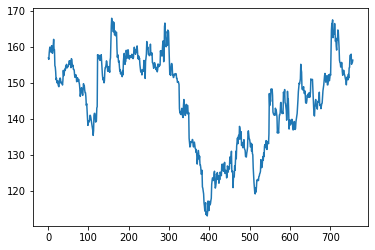

In [296]:
import matplotlib.pyplot as plt

plt.plot( merged1.Day, merged1.Close)

## Function to merge data and variables, plot the curve and scale variables

In [931]:
def merge_plot(filename, varsname):
    stock = pd.read_csv(filename)
    varsdata = pd.read_csv(varsname)
    varsdata.columns = ['Time', 'volumelag', 'rsilag', 'fastKlag', 'fastDlag', 'ADlag',
           'OBVlag', 'MA5lag', 'MA15lag', 'day5Returnlag', 'day15Returnlag',
           'PROClag']
    merged = stock.merge( varsdata, on = 'Time', how = 'left')
    
    price = merged["Close"]
    day3Return = np.zeros(len(merged))
    for i in range(14,len(merged)):
        day3Return[i] = 100*(price[i]-price[i-2])/price[i-2] 

    day3Returnlag = np.append(np.array([0]),day3Return[0:len(day3Return)-1])
    merged['day3Returnlag']=day3Returnlag
    
    MA3 = np.zeros(len(merged))
    for i in range(14,len(merged)):
        MA3[i] = merged.loc[i-2:i+1,'Close'].sum()/3

    MA3lag = np.append(np.array([0]),MA3[0:len(MA3)-1])
    merged['MA3lag']=MA3lag
    
    Closelag = np.append(np.array([0]),merged['Close'][0:len(merged)-1])
    merged['Closelag']=Closelag
    
    merged['Day'] = merged1['Time'].apply(lambda x: int(x.replace('Day', '')))
    
    labels = []
    for day in range(1,746):
        close = merged.loc[merged.Day == day].Close.values[0]
        close10 = merged.loc[merged.Day == day+9].Close.values[0]
        close5 = merged.loc[merged.Day == day+4].Close.values[0]
        if ( close10 - close )/close >= 0.05:
            label = 1
#         elif ( close10 - close )/close >= 0.05:
#             label = 1
#         elif ( close10 - close )/close <= -0.1:
#             label = -2
        elif ( close5 - close )/close <= -0.05:
            label = -1
        else:
            label = 0
        labels.append(label)
    labels.extend( [0]*11 )
    
    plt.plot(merged.Day, merged.Close)
    
    merged1_scaled = merged[16:]
    merged1_scaled = merged1_scaled.drop(columns = 'Time')
    for key in merged1_scaled.keys():
        ss = StandardScaler()
        merged1_scaled[key] = ss.fit_transform(merged1_scaled[key].values.reshape(-1, 1))
    merged1_scaled['Day'] = merged[16:]['Time'].apply(lambda x: int(x.replace('Day', '')))
    merged1_scaled['Label'] = labels[16:]
    
    return merged1_scaled


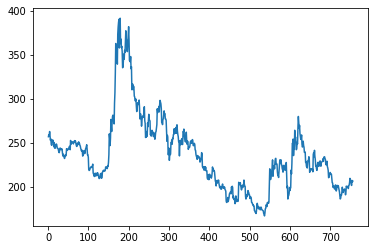

In [849]:
merged_111 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600111.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600111.csv")

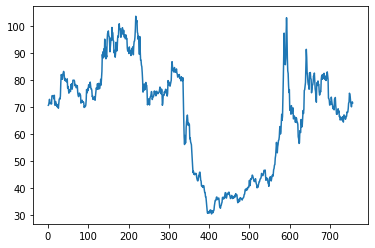

In [850]:
merged_150 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600150.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600150.csv")

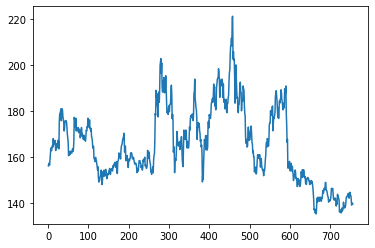

In [932]:
merged_256 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600256.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600256.csv")

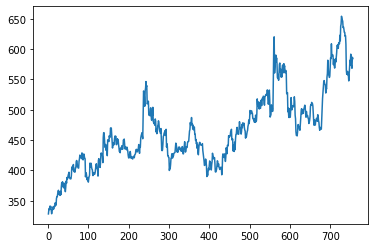

In [852]:
merged_406 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600406.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600406.csv")

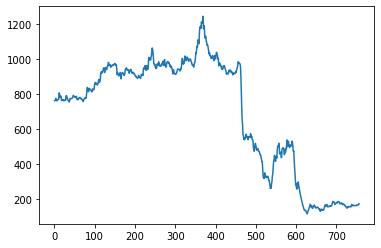

In [853]:
merged_518 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600518.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600518.csv")

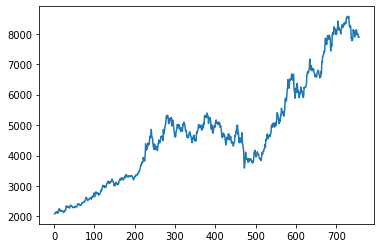

In [892]:
merged_519 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600519.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600519.csv")

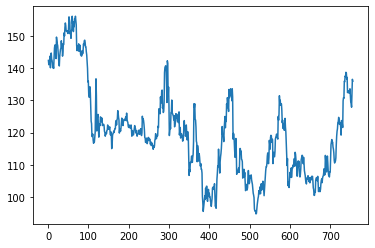

In [915]:
merged_583 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600583.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600583.csv")

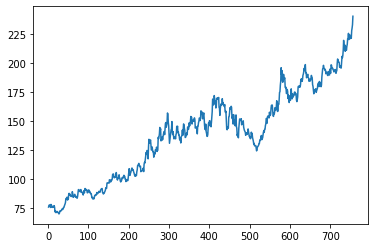

In [856]:
merged_585 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600585.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600585.csv")

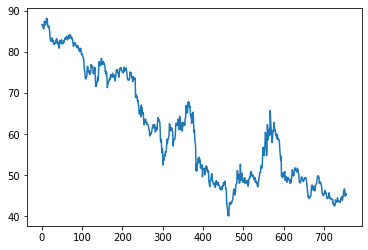

In [857]:
merged_637 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600637.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600637.csv")

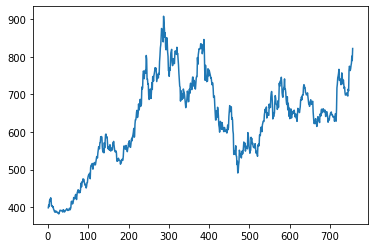

In [858]:
merged_690 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600690.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600690.csv")

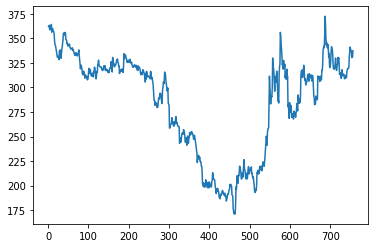

In [859]:
merged_837 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600837.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600837.csv")

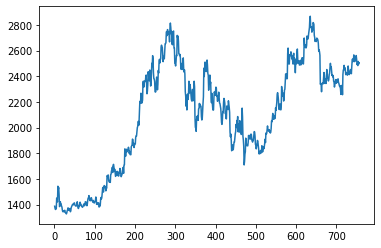

In [860]:
merged_887 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600887.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600887.csv")

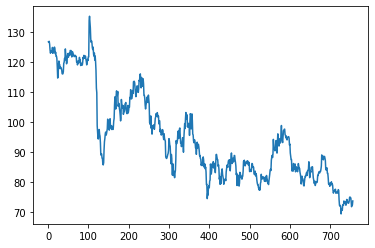

In [861]:
merged_893 = merge_plot("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600893.csv", "/Users/maheshpandit/Documents/DSO530/Homework/engineered features 17-19/SH600893.csv")

In [894]:
merged_519.loc[merged_519.Label == 1].shape

(192, 21)

In [893]:
merged_519.loc[merged_519.Label==-1].shape

(36, 21)

## Function to split the data into train, test, oot and predict the probabilities for each class

In [895]:
def split_predict( df ):
    
    intime = df[df.Day < 505]
    X = intime.drop(columns = ['Label', 'Day'])
    Y = intime['Label']
    
    oot = df[df.Day >= 505]
    X_oot = oot.drop(columns = ['Label', 'Day'])
    Y_oot = oot['Label']
    
    X_train, X_test, Y_train, Y_test = train_test_split( X.values, Y.values, test_size = 0.3 )
    
    model = MLPClassifier( hidden_layer_sizes=(8),  
                           activation='logistic', 
                           solver='sgd', 
                           alpha=0.0001, 
                           verbose = 0,
                           tol = 0.0001,
                           learning_rate = 'adaptive',
                           learning_rate_init = .2
                        )
    
    model.fit( X_train, Y_train )
    predictions_train = pd.DataFrame( model.predict_proba(X_train) )
    predictions_train.columns = [-1,0,1]
    predictions_train['Label'] = Y_train
    len_20 = int(Y_train.shape[0] * (20/100))
    print(f"In the training dataset:\nPercentage of 1s found in top 20%: {predictions_train.sort_values(1, ascending = 0).head(len_20)['Label'].value_counts()[1]/pd.Series(Y_train).value_counts()[1]}\
            The precentage of -1s found: {predictions_train.sort_values(-1, ascending = 0).head(len_20)['Label'].value_counts()[-1]/pd.Series(Y_train).value_counts()[-1]}" )
    training_df = pd.DataFrame( X_train, columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'volumelag', 'rsilag',
                                                    'fastKlag', 'fastDlag', 'ADlag', 'OBVlag', 'MA5lag', 'MA15lag',
                                                    'day5Returnlag', 'day15Returnlag', 'PROClag', 'day3Returnlag', 
                                                    'MA3lag','Closelag'])
    training_df['Label'] = Y_train
    training_df['Prediction:1'] = predictions_train[1]
    training_df['Prediction:-1'] = predictions_train[-1]
          
          
    predictions_test = pd.DataFrame( model.predict_proba(X_test) )
    predictions_test.columns = [-1,0,1]
    predictions_test['Label'] = Y_test
    len_20 = int(Y_test.shape[0] * (20/100))
    print(f"In the test dataset:\nPercentage of 1s found in top 20%: {predictions_test.sort_values(1, ascending = 0).head(len_20)['Label'].value_counts()[1]/pd.Series(Y_test).value_counts()[1]}\
            The precentage of -1s found: {predictions_test.sort_values(-1, ascending = 0).head(len_20)['Label'].value_counts()[-1]/pd.Series(Y_test).value_counts()[-1]}" )
    test_df = pd.DataFrame( X_test, columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'volumelag', 'rsilag',
                                                    'fastKlag', 'fastDlag', 'ADlag', 'OBVlag', 'MA5lag', 'MA15lag',
                                                    'day5Returnlag', 'day15Returnlag', 'PROClag', 'day3Returnlag', 
                                                    'MA3lag','Closelag'])
    test_df['Label'] = Y_test
    test_df['Prediction:1'] = predictions_test[1]
    test_df['Prediction:-1'] = predictions_test[-1]
          
          
    predictions_oot = pd.DataFrame( model.predict_proba(X_oot.values) )
    predictions_oot.columns = [-1,0,1]
    predictions_oot['Label'] = Y_oot.values
    len_20 = int(Y_oot.shape[0] * (20/100))
    print(f"In the oot dataset:\nPercentage of 1s found in top 20%: {predictions_oot.sort_values(1, ascending = 0).head(len_20)['Label'].value_counts()[1]/pd.Series(Y_oot).value_counts()[1]}\
            The precentage of -1s found: {predictions_oot.sort_values(-1, ascending = 0).head(len_20)['Label'].value_counts()[-1]/pd.Series(Y_oot).value_counts()[-1]}" )
#     oot_df = pd.DataFrame( X_oot, columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'volumelag', 'rsilag',
#                                                     'fastKlag', 'fastDlag', 'ADlag', 'OBVlag', 'MA5lag', 'MA15lag',
#                                                     'day5Returnlag', 'day15Returnlag', 'PROClag', 'day3Returnlag', 
#                                                     'MA3lag','Closelag'])
#     oot_df['Day'] = oot['Day']
#     oot_df['Label'] = Y_oot
#     oot_df['Prediction:1'] = predictions_oot[1]
#     oot_df['Prediction:-1'] = predictions_oot[-1]
    oot_df = oot
    oot_df['Prediction:1'] = predictions_oot[1].values
    oot_df['Prediction:-1'] = predictions_oot[-1].values
    
    return( training_df, test_df, oot_df )
    
#     train_eval = X_train.copy()
#     train_eval['Predictions'] = predictions
    
#     train_eval.sort_values('Predictions', ascending = 0)
#     print(train_eval)
    

In [896]:
train_519, test_519, oot_519 = split_predict(merged_519)

In the training dataset:
Percentage of 1s found in top 20%: 0.5662650602409639            The precentage of -1s found: 1.0
In the test dataset:
Percentage of 1s found in top 20%: 0.2777777777777778            The precentage of -1s found: 0.5454545454545454
In the oot dataset:
Percentage of 1s found in top 20%: 0.3287671232876712            The precentage of -1s found: 0.125


/Users/maheshpandit/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/maheshpandit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/maheshpandit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [881]:
test_519.sort_values('Prediction:-1', ascending = 0).head(50)['Label'].value_counts()

 0    20
-1    20
 1    10
Name: Label, dtype: int64

In [882]:
test_519.sort_values('Prediction:-1', ascending = 0)['Label'].value_counts()

 0    83
 1    42
-1    22
Name: Label, dtype: int64

In [897]:
oot_519.loc[oot_519['Prediction:1']>0.5]

,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,ADlag,...,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag,Day,Label,Prediction:1,Prediction:-1
504,-0.413487,-0.438476,-0.409882,-0.438158,-0.804620,-0.002244,-0.079192,0.616002,0.086824,0.627706,...,0.464221,0.767433,1.009992,1.044134,-0.437449,-0.398153,505,0,0.613508,0.001391
505,-0.435601,-0.453887,-0.438631,-0.448074,-0.787320,-0.805579,-0.375796,0.169548,0.269471,-1.290546,...,0.520550,0.672692,-0.842282,0.106059,-0.429782,-0.433902,506,0,0.558756,0.002797
506,-0.462795,-0.471713,-0.438672,-0.446367,-1.074855,-0.788272,-0.457645,0.045618,0.297317,-0.034986,...,0.140221,0.721983,-0.299293,-0.829428,-0.427807,-0.443825,507,0,0.538146,0.001206
507,-0.450112,-0.473927,-0.475564,-0.499771,-0.745758,-1.075926,-0.443974,-0.000567,0.074928,1.306093,...,-0.115083,0.483747,-0.051454,-0.267239,-0.452192,-0.442117,508,0,0.612208,0.002501
508,-0.502063,-0.512114,-0.504930,-0.513182,-0.683675,-0.746692,-0.896172,-0.832606,-0.286535,-1.306292,...,-1.258467,0.289301,-1.240696,-0.935490,-0.470988,-0.495557,509,0,0.601557,0.003081
509,-0.523282,-0.544506,-0.532404,-0.541997,-0.496191,-0.684584,-1.003457,-1.816077,-0.958024,-0.226307,...,-1.028469,-0.154779,-0.381535,-1.166907,-0.494518,-0.508978,510,1,0.529104,0.005458
510,-0.553769,-0.554727,-0.549719,-0.539600,-1.080548,-0.497023,-1.231415,-1.895596,-1.641535,-0.167616,...,-1.240808,-1.211551,-0.724517,-0.804361,-0.517875,-0.537813,511,1,0.859636,0.005036
511,-0.558972,-0.568449,-0.567774,-0.548581,-0.701317,-1.081621,-1.206222,-1.624561,-1.927183,0.864058,...,-1.232437,-1.220734,-0.034624,-0.558644,-0.530104,-0.535414,512,1,0.905097,0.004951
512,-0.552509,-0.564827,-0.549719,-0.571788,-1.143575,-0.702234,-1.282488,-1.416462,-1.783047,1.202359,...,-0.753962,-1.449238,-0.287758,-0.246914,-0.544786,-0.544402,513,1,0.923912,0.008071
513,-0.527347,-0.550945,-0.532362,-0.559920,-0.554313,-1.144674,-1.479417,-1.803007,-1.749652,-1.036157,...,-0.868432,-1.173849,-0.607908,-0.655543,-0.549276,-0.567624,514,1,0.560679,0.009457


In [906]:
oot_519.loc[oot_519['Prediction:-1']>0.5]

,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,ADlag,...,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag,Day,Label,Prediction:1,Prediction:-1
594,0.917751,0.910347,0.828087,0.834092,4.797689,-0.228174,0.987531,0.724004,0.382506,-0.049336,...,-0.093061,-0.001038,0.019055,0.989185,1.018828,1.115777,595,0,0.002890,0.522541
599,0.809461,0.813693,0.791071,0.777193,0.314507,2.000803,-0.515118,-0.661130,-1.469576,1.325295,...,-0.169673,-1.080408,2.717705,0.804999,0.759558,0.843778,600,0,0.014234,0.510860
600,0.753120,0.793653,0.745830,0.755125,0.990864,0.314010,-0.762887,-1.030794,-1.277202,-0.716973,...,-0.142850,-1.217044,-0.949605,1.282472,0.761767,0.782285,601,0,0.021730,0.873899
601,0.774420,0.902300,0.816735,0.919440,1.150054,0.990646,-0.851526,-1.163550,-1.032406,-0.337666,...,-0.137372,-1.400741,-0.400933,-0.976534,0.831197,0.760201,602,0,0.005409,0.786832
602,0.891329,0.898276,0.877441,0.931266,0.208224,1.149901,-0.194480,-0.175091,-0.857098,1.145449,...,1.904194,-0.736614,2.198203,1.304257,0.854401,0.924629,603,0,0.023104,0.591372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,1.953189,1.897104,1.963476,1.925481,-1.058125,-1.054738,-0.608365,0.908044,0.124428,-0.516476,...,0.520919,-0.494134,-0.174735,0.502920,1.950555,1.975110,751,0,0.071110,0.546180
751,1.949806,1.893755,1.919651,1.879700,-0.854825,-1.059189,-0.857444,0.213871,0.471420,-0.074103,...,-0.330228,-0.034065,-0.555279,-0.537938,1.948881,1.931362,752,0,0.085498,0.523380
752,1.854185,1.895062,1.896696,1.892073,-0.735459,-0.855805,-1.106482,-0.473197,0.231510,-0.929974,...,-0.239916,-0.228234,-0.581936,-0.826353,1.927513,1.885550,753,0,0.090328,0.594368
754,1.870685,1.815433,1.871695,1.827733,-0.817214,-1.451058,-1.055101,-0.375739,-0.415045,-0.705452,...,-0.656790,-0.067105,-0.145924,-0.087049,1.882360,1.892566,755,0,0.082180,0.524117


In [900]:
oot_519[oot_519['Label']==-1]

,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,ADlag,...,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag,Day,Label,Prediction:1,Prediction:-1
552,0.251096,0.326877,0.285190,0.359803,1.186339,0.838706,0.953567,0.962090,0.610313,0.558778,...,0.857336,0.904410,0.893078,1.259697,0.219951,0.225151,553,-1,0.005155,0.103232
553,0.387272,0.360396,0.351901,0.329565,2.237709,1.186201,1.494006,1.331914,0.994775,1.529664,...,1.476314,0.878934,2.189077,2.276244,0.275452,0.364607,554,-1,0.001933,0.161927
591,1.002303,1.010463,1.041955,0.992595,0.144251,-0.032566,0.771661,0.006539,0.760067,-1.530545,...,-0.207764,1.063699,-1.028238,-0.995183,1.065002,1.027808,592,-1,0.011944,0.106924
592,0.997018,1.127640,1.000827,1.102206,0.615292,0.143684,0.559840,-0.299386,0.215157,-1.697568,...,-0.319871,0.322133,-0.486169,-1.091476,1.061968,0.997834,593,-1,0.003300,0.128332
593,1.090513,1.111383,1.116439,1.110456,-0.227453,0.614919,0.959514,0.642735,0.123726,0.566541,...,-0.283570,0.672853,1.354708,0.616707,1.066041,1.107521,594,-1,0.015039,0.084105
603,0.923930,0.899483,0.857288,0.837303,0.476924,0.207683,-0.151346,-0.103946,-0.522797,1.353498,...,0.464106,-1.066723,0.072775,1.659775,0.869460,0.936464,604,-1,0.050979,0.706207
681,1.812933,1.823192,1.863306,1.870214,-0.380115,-0.346962,0.911374,0.512631,0.970903,-0.986841,...,0.081418,0.711461,-0.766470,-0.586663,1.851848,1.797682,682,-1,0.066711,0.383134
734,2.076119,2.034392,2.099165,2.059728,-1.043098,-0.010346,-1.022800,-1.570060,-1.791568,-1.273585,...,-1.250854,-0.495176,0.039445,-0.419474,2.061847,2.045272,735,-1,0.080240,0.532906


In [762]:
predictions_oot

,-1,0,1
0,0.275502,0.684925,0.039573
1,0.670408,0.255313,0.074278
2,0.905655,0.082739,0.011606
3,0.761697,0.218569,0.019734
4,0.781286,0.195182,0.023532
...,...,...,...
347,0.030263,0.951761,0.017976
348,0.010870,0.918263,0.070867
349,0.014535,0.980440,0.005025
350,0.025311,0.965839,0.008850


In [826]:
merged_519['Label'].value_counts()

 0    536
 1    192
-1     12
Name: Label, dtype: int64

In [902]:
data_519 = pd.read_csv("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600519.csv")

In [904]:
data_519.loc[data_519.Time=='Day505']

,Time,Open,High,Low,Close,Volume
504,Day505,4095.6192,4107.8785,4054.4582,4061.033,2455448


In [905]:
data_519.loc[data_519.Time=='Day601']

,Time,Open,High,Low,Close,Volume
600,Day601,6061.1411,6204.9648,5978.9561,6071.8936,5998312


In [907]:
data_519.loc[data_519.Time=='Day595']

,Time,Open,High,Low,Close,Volume
594,Day595,6338.5153,6403.5784,6115.9311,6204.9648,13509968


In [908]:
data_519.loc[data_519.Time=='Day700']

,Time,Open,High,Low,Close,Volume
699,Day700,8105.2801,8105.2801,7888.7825,7970.5164,3578857


In [912]:
bp = 4054.4582 * ( 1 + 0.065/100 ) 
sp = 6204.9648 * ( 1 - 0.065/100 )

In [914]:
(sp-bp)/bp

0.528417184212034

In [933]:
train_256, test_256, oot_256 = split_predict(merged_256)

In the training dataset:
Percentage of 1s found in top 20%: 0.6166666666666667            The precentage of -1s found: 0.7407407407407407
In the test dataset:
Percentage of 1s found in top 20%: 0.44            The precentage of -1s found: 0.36363636363636365
In the oot dataset:
Percentage of 1s found in top 20%: 0.55            The precentage of -1s found: 0.7333333333333333


/Users/maheshpandit/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/maheshpandit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/maheshpandit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [938]:
oot_256.loc[oot_256['Prediction:1']>0.8]

,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,ADlag,...,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag,Day,Label,Prediction:1,Prediction:-1
505,0.249088,0.113392,0.155422,0.069164,-0.088882,-0.157463,-0.578000,0.507972,0.948026,-1.188328,...,0.340662,0.344579,-1.148377,-0.366184,0.307855,0.272714,506,0,0.850418,0.083951
511,-0.524276,-0.617833,-0.817551,-0.726401,0.120743,-0.633595,-1.401059,-0.997507,-1.364459,1.634158,...,-0.874166,-1.118613,0.012509,-0.581398,-0.389105,-0.318559,512,0,0.940833,0.004790
513,-0.395385,-0.325346,-0.520250,-0.598087,-0.150173,-0.750778,-1.774447,-1.106385,-1.203251,-0.589682,...,-1.372351,-1.157538,0.299922,-1.384128,-0.591027,-0.678463,514,0,0.808364,0.071676
514,-0.627390,-0.617833,-0.655388,-0.598087,-0.629121,-0.150911,-1.548414,-0.923959,-1.176755,-1.493067,...,-0.763738,-1.079879,0.440787,0.522169,-0.662677,-0.601339,515,0,0.865487,0.062246
515,-0.550053,-0.617833,-0.709438,-0.777730,-0.699286,-0.630067,-1.548414,-0.923959,-1.067228,0.522261,...,-0.763738,-1.079879,0.012509,0.313550,-0.675705,-0.601339,516,1,0.812459,0.029695
516,-0.730504,-0.739706,-0.709438,-0.777730,-0.718149,-0.700262,-1.798617,-1.349615,-1.154851,-1.398310,...,-0.139805,-1.641644,-0.992186,-0.710001,-0.701759,-0.781291,517,0,0.890599,0.032509
517,-0.859401,-0.666583,-0.817551,-0.572425,-0.399895,-0.719133,-1.798617,-1.349615,-1.308193,-1.145609,...,-0.284262,-1.641644,0.012509,-0.710001,-0.695246,-0.781291,518,0,0.917832,0.034306
520,-0.163374,-0.179100,-0.249979,-0.341452,0.099330,-0.290146,-0.291505,0.729380,-0.105415,0.864378,...,1.474486,-0.485150,0.843558,1.226822,-0.408646,-0.267141,521,0,0.837615,0.019575
529,-0.369602,-0.471587,-0.493224,-0.546757,-0.477234,-0.313064,-0.250465,0.590734,0.096455,0.383286,...,-0.272314,0.367181,0.711394,0.923743,-0.512863,-0.369970,530,0,0.900092,0.019327
531,-0.575836,-0.642205,-0.682413,-0.675078,-0.335935,-0.524374,-0.820271,-0.478018,-0.019041,-0.748430,...,-0.065805,0.250920,-0.413495,-0.992460,-0.564971,-0.627045,532,1,0.804896,0.060641


In [942]:
oot_256.loc[oot_256['Prediction:-1']>0.5]

,Open,High,Low,Close,Volume,volumelag,rsilag,fastKlag,fastDlag,ADlag,...,day5Returnlag,day15Returnlag,PROClag,day3Returnlag,MA3lag,Closelag,Day,Label,Prediction:1,Prediction:-1
573,0.945114,1.015236,1.128396,1.172687,1.333973,0.546660,0.358838,-0.624990,-0.477592,1.078187,...,-0.117749,0.434309,1.004872,-0.258210,0.959216,0.915398,574,0,0.195078,0.557447
584,1.074005,0.990858,1.209478,1.121364,0.493961,0.751995,0.302068,-0.033204,-0.313535,1.634158,...,-0.296783,0.500068,0.743194,0.179258,1.063436,1.095350,585,0,0.165493,0.535735


In [923]:
pd.set_option('display.max_rows',None)

In [946]:
data_256 = pd.read_csv("/Users/maheshpandit/Documents/DSO530/Homework/raw data 17-19/SH600256.csv")
data_256.loc[data_256.Time=='Day574']

,Time,Open,High,Low,Close,Volume
573,Day574,180.5169,184.6572,180.5169,184.2431,98023200


In [947]:
data_256.loc[data_256.Time=='Day506']

,Time,Open,High,Low,Close,Volume
505,Day506,169.3381,169.3381,165.6118,166.4399,44091856


In [948]:
bp = 166.4399 * ( 1 + 0.065/100 ) 
sp = 184.2431 * ( 1 - 0.065/100 )
(sp-bp)/bp

0.10552661684061165